In [2]:
import requests
import pandas as pd
import json
pd_v = pd.__version__
python_v = !python -V
print("version", *python_v)
print("version Pandas", pd_v)

version Python 3.10.5
version Pandas 2.0.2


**Входные данные**

In [4]:
url = 'https://rss.applemarketingtools.com/api/v2/ru/apps/top-paid/100/apps.json'
response = requests.get(url)
response.status_code

200

In [ ]:
#top_app_json['feed']['results']

In [36]:
# Получаем все атрибуты
top_app_json = json.loads(response.text)
top_app_set = set()
genre_set = set()
# На случай если есть разное кол-во атрибутов или их имен проходимся по всему датасету
for i in top_app_json['feed']['results']:
    top_app_set.update(set(i.keys()))
    if len(i['genres']) > 0:
        for j in i['genres']:
            genre_set.update(set(j.keys()))
print("Аpplication attributes:", top_app_set)
print("Genre attributes:", genre_set)

Аpplication attributes: {'kind', 'name', 'releaseDate', 'genres', 'id', 'artistName', 'artworkUrl100', 'url'}
Genre attributes: {'name', 'genreId', 'url'}


**Решение**

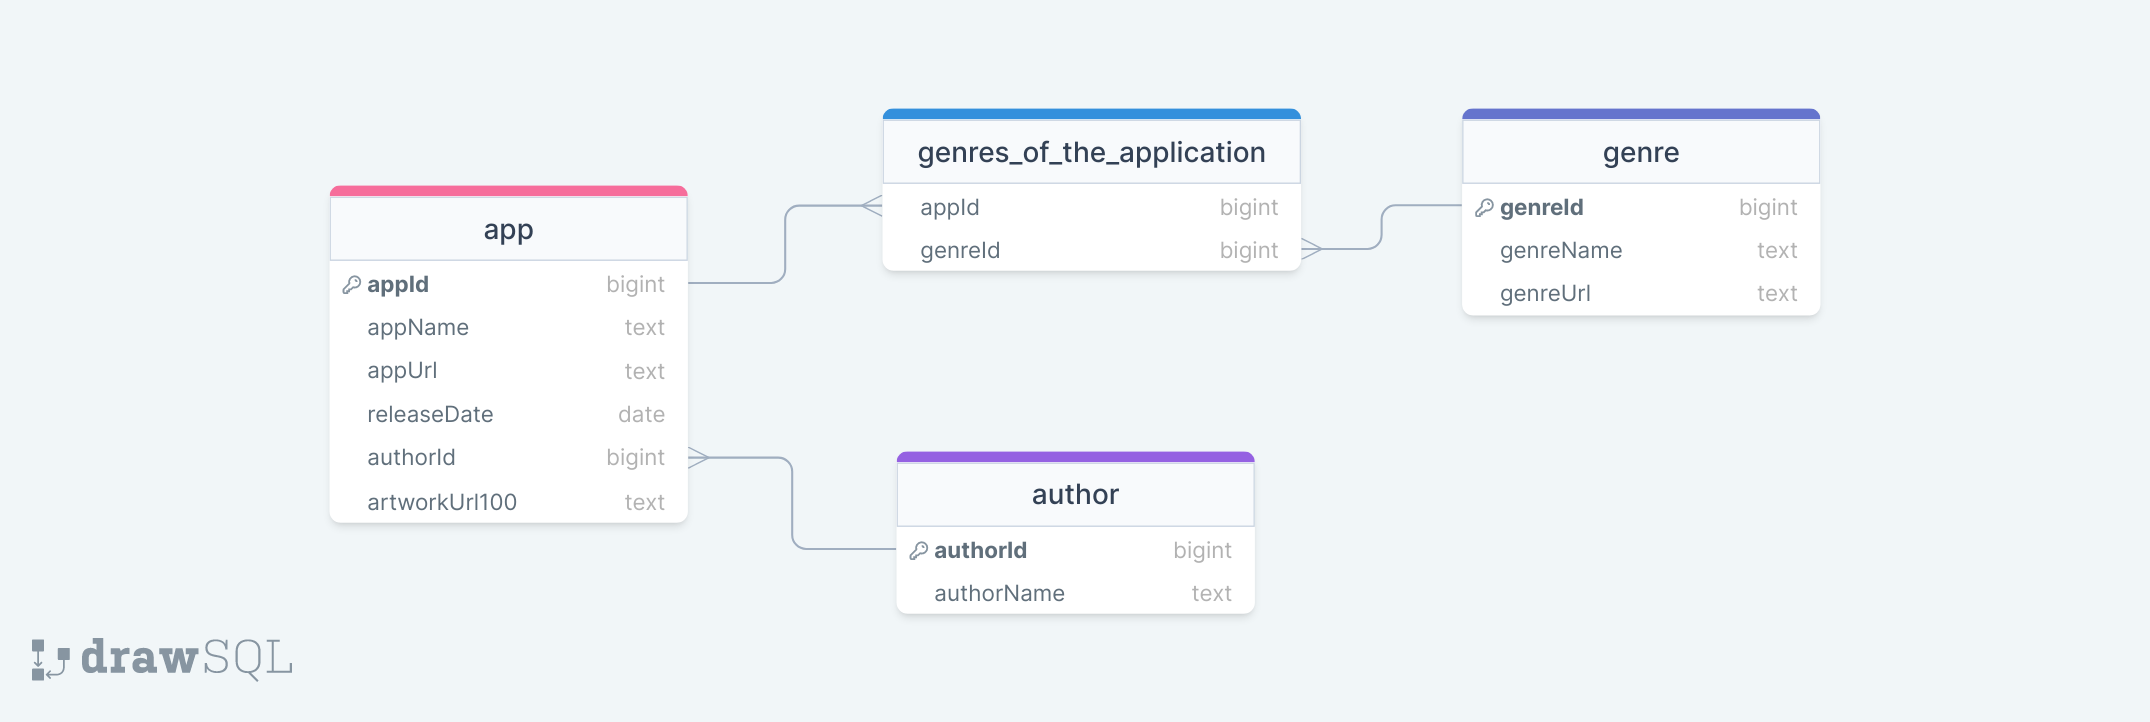

In [ ]:
#Cущность - приложение (поля: appId, appName, artworkUrl100, appUrl, releaseDate, authorId)
dict_app = {}
#Cущность - автор (поля: authorId, artistName)
dict_author = {}
#Cущность - жанр (поля: genreId, genreName, genreUrl)
dict_genre = {}


In [47]:
#Cущность - приложение (поля: appId, appName, appUrl, artworkUrl100, releaseDate, authorId)
df_app = pd.read_json(response.text, orient='index')
df_app = df_app.results.explode('results').reset_index(drop=True)
df_app = pd.DataFrame(df_app.to_list(), columns = ['kind', 'name', 'releaseDate', 'genres', 'id', 'artistName', 'artworkUrl100', 'url'])
df_app

,kind,name,releaseDate,genres,id,artistName,artworkUrl100,url
0,apps,Антирадар HUD Speed Pro,2014-04-17,[],856861890,Dmitry Filinsky,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/%D0%B0%D0%BD%D1%...
1,apps,Threema. Безопасный мессенджер,2012-12-28,[],578665578,Threema GmbH,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/threema-%D0%B1%D...
2,apps,Антирадар Стрелка,2013-04-20,[],606147643,Vitaly Shmuradko,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/%D0%B0%D0%BD%D1%...
3,apps,EE35 Film Camera,2017-11-15,[],1313164055,"EIGHTIVE DESIGN, Inc.",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/ee35-film-camera...
4,apps,Моя статистика для ВКонтакте,2015-06-03,[],976648744,Oleg Lavrynenko,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/%D0%BC%D0%BE%D1%...
...,...,...,...,...,...,...,...,...
93,apps,Meditate - Mindfulness app,2017-06-14,"[{'genreId': '6013', 'name': 'Здоровье и фитне...",1242738872,RhythmicWorks,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/meditate-mindful...
94,apps,Перехват информации,2021-05-20,"[{'genreId': '6002', 'name': 'Утилиты', 'url':...",1568104730,jun ye,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/%D0%BF%D0%B5%D1%...
95,apps,Stargate ESP Trainer,2021-05-30,"[{'genreId': '6017', 'name': 'Образование', 'u...",1565036180,Russell Targ,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/stargate-esp-tra...
96,apps,VS – Visual Synthesizer,2021-06-14,"[{'genreId': '6011', 'name': 'Музыка', 'url': ...",1560330289,Imaginando Lda,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/ru/app/vs-visual-synthe...


In [92]:
# Распаковка колонки 'basket'
df = df_transactions.explode('basket').reset_index(drop=True)
split_df = pd.DataFrame(df['basket'].to_list(), columns = ['product_id', 'price'])
df = pd.concat([df, split_df], axis=1)
df = df.drop('basket', axis=1)
df.sample(5)

,customer_id,date_of_purchase,product_id,price
1570,C117,2023-04-29 08:30:01.404093,P62,1875
2148,C87,2023-05-10 14:52:01.404093,P59,1134
21,C40,2023-03-28 01:13:30.397598,P35,1463
2238,C120,2023-05-12 15:49:01.404093,P04,1794
113,C135,2023-03-28 20:59:01.404093,P51,1064


In [93]:
# Перевод даты в день недели
df['date_of_purchase'] = df['date_of_purchase'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f').dayofweek)
df.rename(columns={"date_of_purchase": "day_of_week"}, inplace=True)
df.sample(5)

,customer_id,day_of_week,product_id,price
4159,C123,4,P45,418
646,C44,6,P40,852
775,C90,2,P61,1763
2727,C137,1,P14,1226
4286,C24,2,P24,1220


In [94]:
# Вычисление результирующих колонок
def set_to_list(row):
    return list(set(row))

df['quantity'] = 1
df = df.groupby(['customer_id', 'day_of_week']).agg(
    price_max=pd.NamedAgg(column='price', aggfunc="max"),
    price_min=pd.NamedAgg(column='price', aggfunc="min"),
    price_median=pd.NamedAgg(column='price', aggfunc="median"),
    price_mean=pd.NamedAgg(column='price', aggfunc="mean"),
    quantity=pd.NamedAgg(column='quantity', aggfunc="sum"),
    products=pd.NamedAgg(column='product_id', aggfunc=set_to_list)
    ).reset_index()


In [95]:
# Результат
df

,customer_id,day_of_week,price_max,price_min,price_median,price_mean,quantity,products
0,C1,0,1946,395,1541.0,1300.800000,5,"[P48, P61, P63, P43, P52]"
1,C1,1,1674,357,811.0,987.200000,5,"[P45, P58, P01, P63, P59]"
2,C1,3,1363,895,1224.0,1160.666667,3,"[P13, P15, P17]"
3,C1,4,1870,906,1388.0,1388.000000,2,"[P63, P64]"
4,C1,5,831,778,804.5,804.500000,2,"[P43, P57]"
...,...,...,...,...,...,...,...,...
807,C99,0,1075,441,499.0,671.666667,3,"[P41, P59]"
808,C99,1,1563,1004,1283.5,1283.500000,2,"[P53, P23]"
809,C99,4,226,124,175.0,175.000000,2,"[P55, P57]"
810,C99,5,1735,1001,1316.0,1350.666667,3,"[P51, P54, P43]"
